# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

# create new dataframes for each subgroup
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# sum costs by year
hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()
hydrological_costs = hydrological_costs.squeeze()

# SPLIT HYDROLOGICAL DISASTERS

In [4]:
# display unique types
for dtype in hydrological_data['Disaster Type'].unique():
    print(dtype)

Flood
Landslide


In [5]:
# create new dataframes for each type
flood_data = hydrological_data[hydrological_data['Disaster Type'] == 'Flood']
landslide_data = hydrological_data[hydrological_data['Disaster Type'] == 'Landslide']

# count number of disasters in each year for each subgroup
flood_disaster_counts = flood_data['Year'].value_counts().sort_index()
landslide_disaster_counts = landslide_data['Year'].value_counts().sort_index()

# save index of years
flood_disaster_counts_index = flood_disaster_counts.index
landslide_disaster_counts_index = landslide_disaster_counts.index

# PLOT HYDROLOGICAL DISASTERS

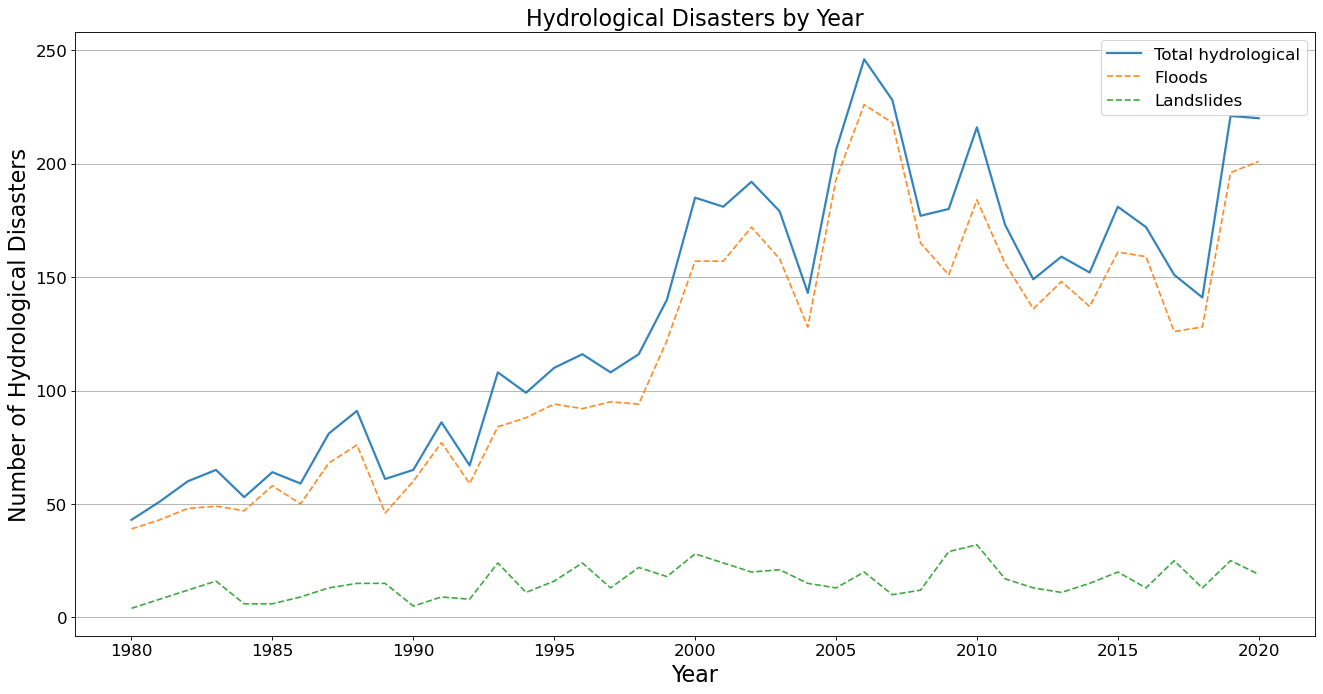

In [6]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hydrological Disasters")
plt.plot(hydrological_disaster_counts_index,hydrological_disaster_counts, linewidth=2, alpha = 0.9)
plt.plot(flood_disaster_counts_index, flood_disaster_counts, linestyle = '--', alpha = 0.9)
plt.plot(landslide_disaster_counts_index, landslide_disaster_counts, linestyle = '--', alpha = 0.9)

plt.legend(['Total hydrological', 'Floods', 'Landslides'])

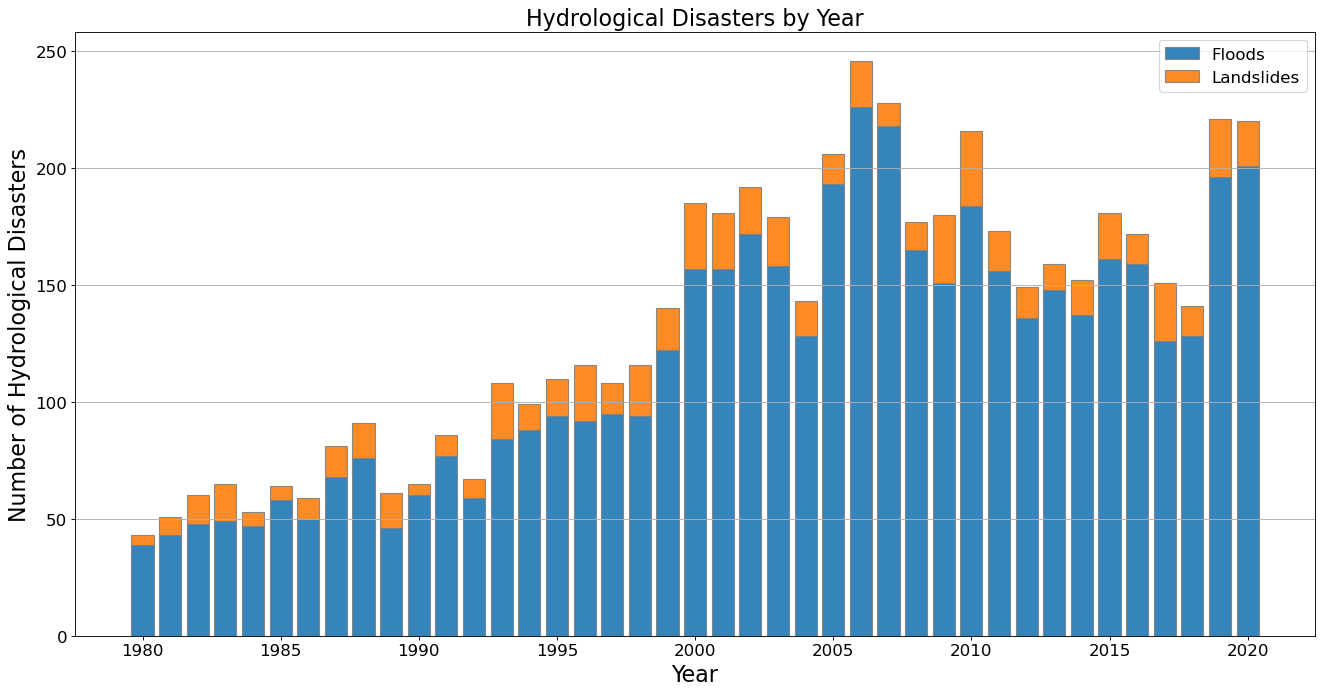

In [7]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Hydrological Disasters")

plt.bar(flood_disaster_counts_index, flood_disaster_counts, edgecolor = 'grey', alpha = 0.9)
plt.bar(landslide_disaster_counts_index, landslide_disaster_counts, bottom = flood_disaster_counts, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Floods', 'Landslides'])

# BOXPLOT HYDROLOGICAL DISASTERS BY DECADE

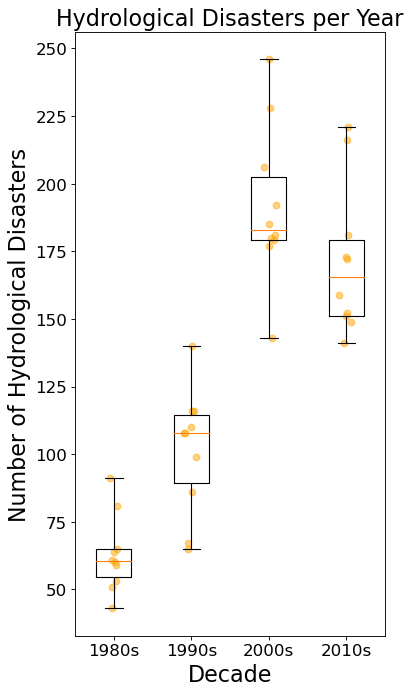

In [8]:
# BOXPLOT TOTAL HYDROLOGICAL DATA

total_box_data = [hydrological_disaster_counts[0:10], hydrological_disaster_counts[10:20], hydrological_disaster_counts[20:30], hydrological_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Hydrological Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Hydrological Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

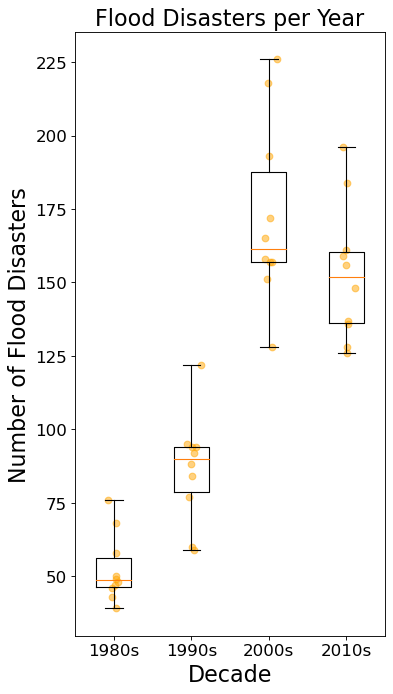

In [19]:
# BOXPLOT FLOOD DATA

total_box_data = [flood_disaster_counts[0:10], flood_disaster_counts[10:20], flood_disaster_counts[20:30], flood_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Flood Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Flood Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

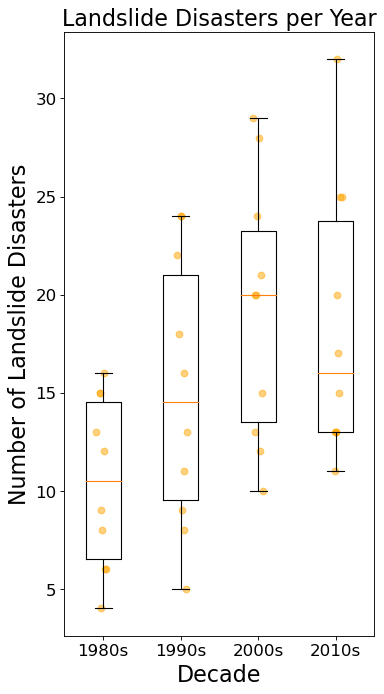

In [20]:
# BOXPLOT LANDSLIDE DATA

total_box_data = [landslide_disaster_counts[0:10], landslide_disaster_counts[10:20], landslide_disaster_counts[20:30], landslide_disaster_counts[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

x0 = [np.random.normal(1,0.04,10)]
x1 = [np.random.normal(2,0.04,10)]
x2 = [np.random.normal(3,0.04,10)]
x3 = [np.random.normal(4,0.04,10)]

plt.figure(figsize=(5,10), dpi=80)
plt.title("Landslide Disasters per Year")
plt.xlabel("Decade")
plt.ylabel("Number of Landslide Disasters")

plt.boxplot(total_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,total_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,total_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,total_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,total_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE HYDROLOGICAL DISASTER OCCURANCES

In [21]:
# HYDROLOGICAL DISASTER ANALYSIS

print("HYDROLOGICAL DISASTER ANALYSIS")

# hydrological statistical data
print("\nTotal Hydrological Statistical Data: ")
print(hydrological_disaster_counts.describe())

# 1980s hydrological statistical data
print("\n1980s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[0:10].describe())

# 1990s hydrological statistical data
print("\n1990s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[10:20].describe())

# 2000s hydrological statistical data
print("\n2000s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[20:30].describe())

# 2010s hydrological statistical data
print("\n2010s Hydrological Statistical Data: ")
print(hydrological_disaster_counts[30:40].describe())

print("\n")

# hydrological statistical changes 1980s-2010s
hydrological_mean_1980s = hydrological_disaster_counts[0:10].mean()
hydrological_mean_2010s = hydrological_disaster_counts[30:40].mean()
mean_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_2010s-hydrological_mean_1980s)/hydrological_mean_1980s
print("Mean Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_hydrological_1980_to_2020))

hydrological_max_1980s = hydrological_disaster_counts[0:10].max()
hydrological_max_2010s = hydrological_disaster_counts[30:40].max()
max_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_2010s-hydrological_max_1980s)/hydrological_max_1980s
print("Max Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_hydrological_1980_to_2020))

hydrological_min_1980s = hydrological_disaster_counts[0:10].min()
hydrological_min_2010s = hydrological_disaster_counts[30:40].min()
min_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_2010s-hydrological_min_1980s)/hydrological_min_1980s
print("Min Hydrological Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_hydrological_1980_to_2020))

hydrological_std_1980s = hydrological_disaster_counts[0:10].std()
hydrological_std_2010s = hydrological_disaster_counts[30:40].std()
std_percent_change_hydrological_1980_to_2020 = 100*(hydrological_std_2010s-hydrological_std_1980s)/hydrological_std_1980s
print("Standard Deviation of Hydrological Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_hydrological_1980_to_2020))

HYDROLOGICAL DISASTER ANALYSIS

Total Hydrological Statistical Data: 
count     41.000000
mean     134.024390
std       58.535241
min       43.000000
25%       81.000000
50%      141.000000
75%      180.000000
max      246.000000
Name: Year, dtype: float64

1980s Hydrological Statistical Data: 
count    10.000000
mean     62.800000
std      14.085453
min      43.000000
25%      54.500000
50%      60.500000
75%      64.750000
max      91.000000
Name: Year, dtype: float64

1990s Hydrological Statistical Data: 
count     10.00000
mean     101.50000
std       23.16247
min       65.00000
25%       89.25000
50%      108.00000
75%      114.50000
max      140.00000
Name: Year, dtype: float64

2000s Hydrological Statistical Data: 
count     10.000000
mean     191.700000
std       28.898481
min      143.000000
25%      179.250000
50%      183.000000
75%      202.500000
max      246.000000
Name: Year, dtype: float64

2010s Hydrological Statistical Data: 
count     10.000000
mean     171.500000
st

In [26]:
# FLOOD DISASTER ANALYSIS

print("FLOOD DISASTER ANALYSIS")

# flood statistical data
print("\nTotal Flood Statistical Data: ")
print(flood_disaster_counts.describe())

# 1980s flood statistical data
print("\n1980s Flood Statistical Data: ")
print(flood_disaster_counts[0:10].describe())

# 1990s flood statistical data
print("\n1990s Flood Statistical Data: ")
print(flood_disaster_counts[10:20].describe())

# 2000s flood statistical data
print("\n2000s Flood Statistical Data: ")
print(flood_disaster_counts[20:30].describe())

# 2010s flood statistical data
print("\n2010s Flood Statistical Data: ")
print(flood_disaster_counts[30:40].describe())

print("\n")

# flood statistical changes 1980s-2010s
flood_mean_1980s = flood_disaster_counts[0:10].mean()
flood_mean_2010s = flood_disaster_counts[30:40].mean()
mean_percent_change_flood_1980_to_2020 = 100*(flood_mean_2010s-flood_mean_1980s)/flood_mean_1980s
print("Mean Flood Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_flood_1980_to_2020))

flood_max_1980s = flood_disaster_counts[0:10].max()
flood_max_2010s = flood_disaster_counts[30:40].max()
max_percent_change_flood_1980_to_2020 = 100*(flood_max_2010s-flood_max_1980s)/flood_max_1980s
print("Max Flood Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_flood_1980_to_2020))

flood_min_1980s = flood_disaster_counts[0:10].min()
flood_min_2010s = flood_disaster_counts[30:40].min()
min_percent_change_flood_1980_to_2020 = 100*(flood_min_2010s-flood_min_1980s)/flood_min_1980s
print("Min Flood Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_flood_1980_to_2020))

flood_std_1980s = flood_disaster_counts[0:10].std()
flood_std_2010s = flood_disaster_counts[30:40].std()
std_percent_change_flood_1980_to_2020 = 100*(flood_std_2010s-flood_std_1980s)/flood_std_1980s
print("Standard Deviation of Flood Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_flood_1980_to_2020))

FLOOD DISASTER ANALYSIS

Total Flood Statistical Data: 
count     41.000000
mean     118.195122
std       54.655841
min       39.000000
25%       68.000000
50%      126.000000
75%      158.000000
max      226.000000
Name: Year, dtype: float64

1980s Flood Statistical Data: 
count    10.000000
mean     52.400000
std      11.577756
min      39.000000
25%      46.250000
50%      48.500000
75%      56.000000
max      76.000000
Name: Year, dtype: float64

1990s Flood Statistical Data: 
count     10.000000
mean      86.500000
std       18.356047
min       59.000000
25%       78.750000
50%       90.000000
75%       94.000000
max      122.000000
Name: Year, dtype: float64

2000s Flood Statistical Data: 
count     10.000000
mean     172.500000
std       30.808549
min      128.000000
25%      157.000000
50%      161.500000
75%      187.750000
max      226.000000
Name: Year, dtype: float64

2010s Flood Statistical Data: 
count     10.000000
mean     153.100000
std       23.196983
min      126.000

In [27]:
# LANDSLIDE DISASTER ANALYSIS

print("LANDSLIDE DISASTER ANALYSIS")

# landslide statistical data
print("\nTotal Landslide Statistical Data: ")
print(landslide_disaster_counts.describe())

# 1980s landslide statistical data
print("\n1980s Landslide Statistical Data: ")
print(landslide_disaster_counts[0:10].describe())

# 1990s landslide statistical data
print("\n1990s Landslide Statistical Data: ")
print(landslide_disaster_counts[10:20].describe())

# 2000s landslide statistical data
print("\n2000s Landslide Statistical Data: ")
print(landslide_disaster_counts[20:30].describe())

# 2010s landslide statistical data
print("\n2010s Landslide Statistical Data: ")
print(landslide_disaster_counts[30:40].describe())

print("\n")

# landslide statistical changes 1980s-2010s
landslide_mean_1980s = landslide_disaster_counts[0:10].mean()
landslide_mean_2010s = landslide_disaster_counts[30:40].mean()
mean_percent_change_landslide_1980_to_2020 = 100*(landslide_mean_2010s-landslide_mean_1980s)/landslide_mean_1980s
print("Mean Landslide Disaster Change (1980s-2010s): {:.2f}%".format(mean_percent_change_landslide_1980_to_2020))

landslide_max_1980s = landslide_disaster_counts[0:10].max()
landslide_max_2010s = landslide_disaster_counts[30:40].max()
max_percent_change_landslide_1980_to_2020 = 100*(landslide_max_2010s-landslide_max_1980s)/landslide_max_1980s
print("Max Landslide Disaster Change (1980s-2010s): {:.2f}%".format(max_percent_change_landslide_1980_to_2020))

landslide_min_1980s = landslide_disaster_counts[0:10].min()
landslide_min_2010s = landslide_disaster_counts[30:40].min()
min_percent_change_landslide_1980_to_2020 = 100*(landslide_min_2010s-landslide_min_1980s)/landslide_min_1980s
print("Min Landslide Disaster Change (1980s-2010s): {:.2f}%".format(min_percent_change_landslide_1980_to_2020))

landslide_std_1980s = landslide_disaster_counts[0:10].std()
landslide_std_2010s = landslide_disaster_counts[30:40].std()
std_percent_change_landslide_1980_to_2020 = 100*(landslide_std_2010s-landslide_std_1980s)/landslide_std_1980s
print("Standard Deviation of Landslide Disasters Change (1980s-2010s): {:.2f}%\n".format(std_percent_change_landslide_1980_to_2020))

LANDSLIDE DISASTER ANALYSIS

Total Landslide Statistical Data: 
count    41.000000
mean     15.829268
std       6.913402
min       4.000000
25%      11.000000
50%      15.000000
75%      20.000000
max      32.000000
Name: Year, dtype: float64

1980s Landslide Statistical Data: 
count    10.000000
mean     10.400000
std       4.351245
min       4.000000
25%       6.500000
50%      10.500000
75%      14.500000
max      16.000000
Name: Year, dtype: float64

1990s Landslide Statistical Data: 
count    10.000000
mean     15.000000
std       6.879922
min       5.000000
25%       9.500000
50%      14.500000
75%      21.000000
max      24.000000
Name: Year, dtype: float64

2000s Landslide Statistical Data: 
count    10.000000
mean     19.200000
std       6.613118
min      10.000000
25%      13.500000
50%      20.000000
75%      23.250000
max      29.000000
Name: Year, dtype: float64

2010s Landslide Statistical Data: 
count    10.000000
mean     18.400000
std       6.915361
min      11.000000


# HYDROLOGICAL DISASTER COSTS

In [10]:
flood_costs = flood_data[['Year', 'Total Damages']]
flood_costs = flood_costs.groupby('Year').sum()
flood_costs = flood_costs.squeeze()

landslide_costs = landslide_data[['Year', 'Total Damages']]
landslide_costs = landslide_costs.groupby('Year').sum()
landslide_costs = landslide_costs.squeeze()
landslide_costs = landslide_costs.sort_index()

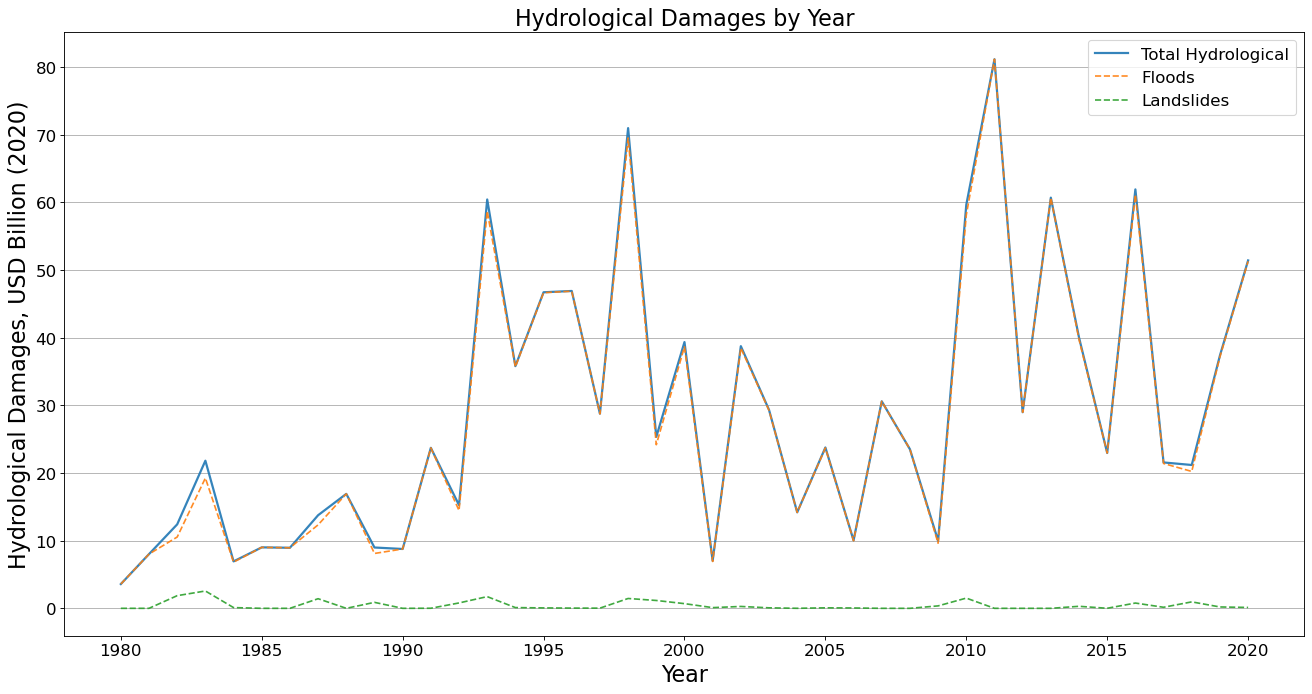

In [11]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Hydrological Damages, USD Billion (2020)")
plt.plot(hydrological_costs.index, hydrological_costs, linewidth=2, alpha = 0.9)
plt.plot(flood_costs.index, flood_costs, linestyle = '--', alpha = 0.9)
plt.plot(landslide_costs.index, landslide_costs, linestyle = '--', alpha = 0.9)

plt.legend(['Total Hydrological', 'Floods', 'Landslides'])

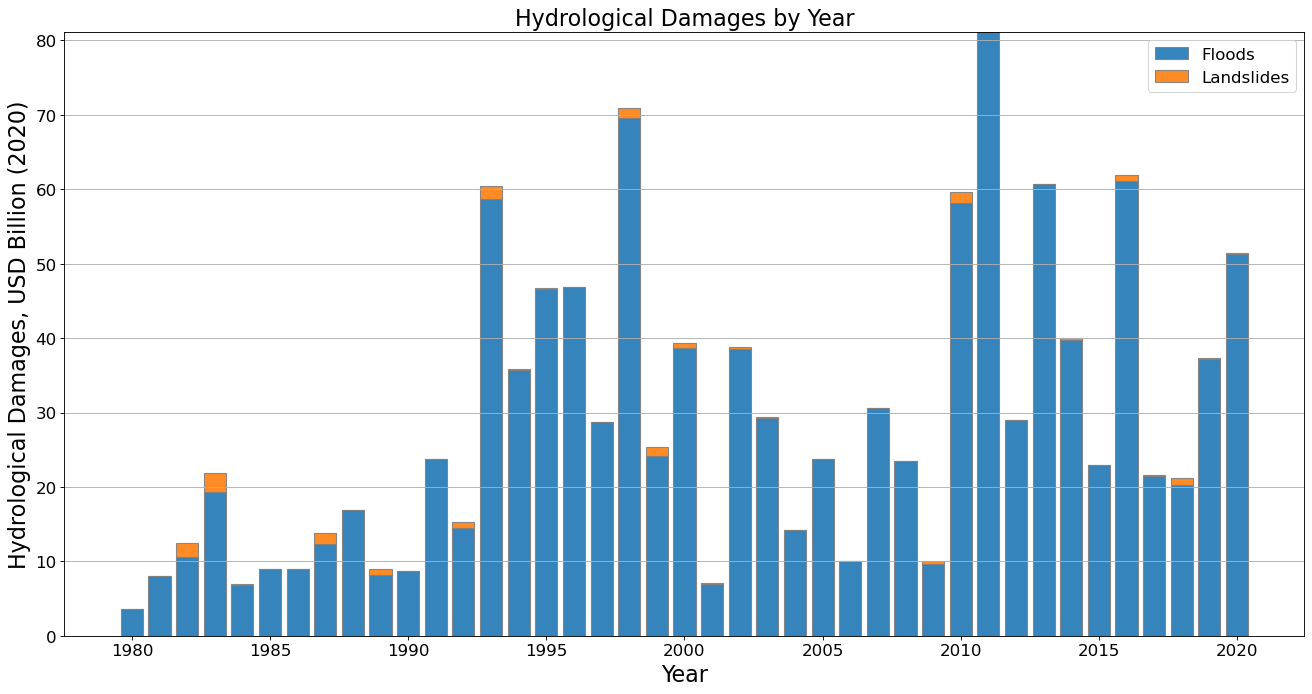

In [12]:
# bar chart

plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Hydrological Damages by Year")
plt.xlabel("Year")
plt.ylabel("Hydrological Damages, USD Billion (2020)")

plt.bar(flood_costs.index, flood_costs, edgecolor = 'grey', alpha = 0.9)
plt.bar(landslide_costs.index, landslide_costs, bottom = flood_costs, edgecolor = 'grey', alpha = 0.9)

plt.legend(['Floods', 'Landslides'])

# BOXPLOT HYDROLOGICAL DAMAGES BY DECADE

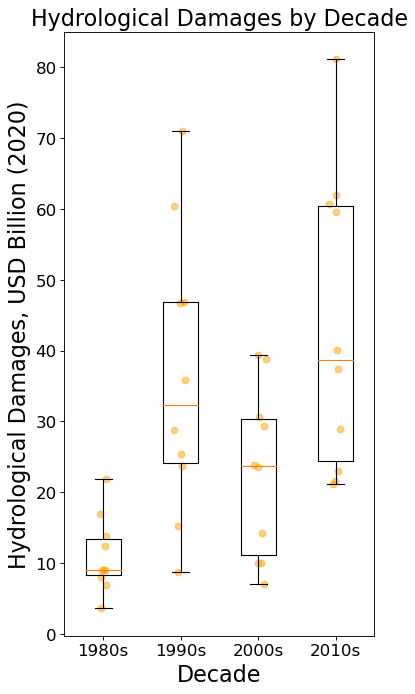

In [13]:
# BOXPLOT TOTAL HYDROLOGICAL COST DATA

hydrological_box_data = [hydrological_costs[0:10], hydrological_costs[10:20], hydrological_costs[20:30], hydrological_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Hydrological Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Hydrological Damages, USD Billion (2020)")

plt.boxplot(hydrological_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,hydrological_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,hydrological_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,hydrological_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,hydrological_box_data[3], color = 'orange', alpha = 0.5)

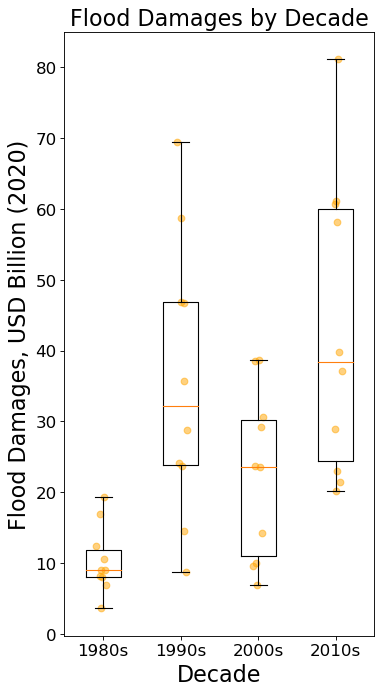

In [28]:
# BOXPLOT FLOOD COST DATA

flood_box_data = [flood_costs[0:10], flood_costs[10:20], flood_costs[20:30], flood_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Flood Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Flood Damages, USD Billion (2020)")

plt.boxplot(flood_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,flood_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,flood_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,flood_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,flood_box_data[3], color = 'orange', alpha = 0.5)

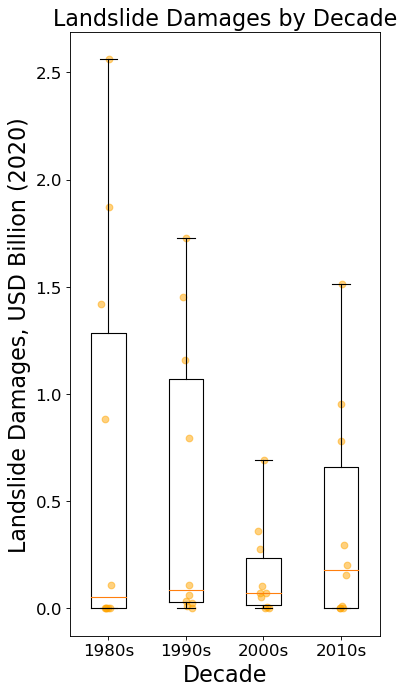

In [29]:
# BOXPLOT LANDSLIDE COST DATA

landslide_box_data = [landslide_costs[0:10], landslide_costs[10:20], landslide_costs[20:30], landslide_costs[30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Landslide Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Landslide Damages, USD Billion (2020)")

plt.boxplot(landslide_box_data, labels = box_labels, whis = [0, 100])

plt.scatter(x0,landslide_box_data[0], color = 'orange', alpha = 0.5)
plt.scatter(x1,landslide_box_data[1], color = 'orange', alpha = 0.5)
plt.scatter(x2,landslide_box_data[2], color = 'orange', alpha = 0.5)
plt.scatter(x3,landslide_box_data[3], color = 'orange', alpha = 0.5)

# ANALYZE DISASTER COSTS

In [30]:
# HYDROLOGICAL DISASTER COST ANALYSIS

print("HYDROLOGICAL DISASTER COST ANALYSIS")

# hydrological costs statistical data
print("\nTotal Hydrological Costs Statistical Data: ")
print(hydrological_costs.describe())

# 1980s hydrological costs statistical data
print("\n1980s Hydrological Costs Statistical Data: ")
print(hydrological_costs[0:10].describe())

# 1990s hydrological costs statistical data
print("\n1990s Hydrological Costs Statistical Data: ")
print(hydrological_costs[10:20].describe())

# 2000s hydrological costs statistical data
print("\n2000s Hydrological Costs Statistical Data: ")
print(hydrological_costs[20:30].describe())

# 2010s hydrological costs statistical data
print("\n2010s Hydrological Costs Statistical Data: ")
print(hydrological_costs[30:40].describe())

print("\n")

# hydrological costs statistical changes 1980s-2010s
hydrological_mean_costs_1980s = hydrological_costs[0:10].mean()
hydrological_mean_costs_2010s = hydrological_costs[30:40].mean()
mean_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_mean_costs_2010s-hydrological_mean_costs_1980s)/hydrological_mean_costs_1980s
print("Mean Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_hydrological_1980_to_2020))

hydrological_max_costs_1980s = hydrological_costs[0:10].max()
hydrological_max_costs_2010s = hydrological_costs[30:40].max()
max_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_max_costs_2010s-hydrological_max_costs_1980s)/hydrological_max_costs_1980s
print("Max Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_hydrological_1980_to_2020))

hydrological_min_costs_1980s = hydrological_costs[0:10].min()
hydrological_min_costs_2010s = hydrological_costs[30:40].min()
min_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_min_costs_2010s-hydrological_min_costs_1980s)/hydrological_min_costs_1980s
print("Min Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_hydrological_1980_to_2020))

hydrological_std_costs_1980s = hydrological_costs[0:10].std()
hydrological_std_costs_2010s = hydrological_costs[30:40].std()
std_costs_percent_change_hydrological_1980_to_2020 = 100*(hydrological_std_costs_2010s-hydrological_std_costs_1980s)/hydrological_std_costs_1980s
print("Standard Deviation of Hydrological Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_hydrological_1980_to_2020))

HYDROLOGICAL DISASTER COST ANALYSIS

Total Hydrological Costs Statistical Data: 
count    41.000000
mean     28.939986
std      19.893487
min       3.587959
25%      12.411392
50%      23.724374
75%      39.351711
max      81.156760
Name: Total Damages, dtype: float64

1980s Hydrological Costs Statistical Data: 
count    10.000000
mean     11.039503
std       5.314683
min       3.587959
25%       8.247975
50%       9.000335
75%      13.424207
max      21.817150
Name: Total Damages, dtype: float64

1990s Hydrological Costs Statistical Data: 
count    10.000000
mean     36.266969
std      19.837327
min       8.769764
25%      24.128325
50%      32.281213
75%      46.857171
max      70.976227
Name: Total Damages, dtype: float64

2000s Hydrological Costs Statistical Data: 
count    10.000000
mean     22.655621
std      11.939889
min       7.027196
25%      11.077572
50%      23.643441
75%      30.278567
max      39.351711
Name: Total Damages, dtype: float64

2010s Hydrological Costs Statis

In [31]:
# FLOOD DISASTER COST ANALYSIS

print("FLOOD DISASTER COST ANALYSIS")

# flood costs statistical data
print("\nTotal Flood Costs Statistical Data: ")
print(flood_costs.describe())

# 1980s flood costs statistical data
print("\n1980s Flood Costs Statistical Data: ")
print(flood_costs[0:10].describe())

# 1990s flood costs statistical data
print("\n1990s Flood Costs Statistical Data: ")
print(flood_costs[10:20].describe())

# 2000s flood costs statistical data
print("\n2000s Flood Costs Statistical Data: ")
print(flood_costs[20:30].describe())

# 2010s flood costs statistical data
print("\n2010s Flood Costs Statistical Data: ")
print(flood_costs[30:40].describe())

print("\n")

# flood costs statistical changes 1980s-2010s
flood_mean_costs_1980s = flood_costs[0:10].mean()
flood_mean_costs_2010s = flood_costs[30:40].mean()
mean_costs_percent_change_flood_1980_to_2020 = 100*(flood_mean_costs_2010s-flood_mean_costs_1980s)/flood_mean_costs_1980s
print("Mean Flood Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_flood_1980_to_2020))

flood_max_costs_1980s = flood_costs[0:10].max()
flood_max_costs_2010s = flood_costs[30:40].max()
max_costs_percent_change_flood_1980_to_2020 = 100*(flood_max_costs_2010s-flood_max_costs_1980s)/flood_max_costs_1980s
print("Max Flood Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_flood_1980_to_2020))

flood_min_costs_1980s = flood_costs[0:10].min()
flood_min_costs_2010s = flood_costs[30:40].min()
min_costs_percent_change_flood_1980_to_2020 = 100*(flood_min_costs_2010s-flood_min_costs_1980s)/flood_min_costs_1980s
print("Min Flood Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_flood_1980_to_2020))

flood_std_costs_1980s = flood_costs[0:10].std()
flood_std_costs_2010s = flood_costs[30:40].std()
std_costs_percent_change_flood_1980_to_2020 = 100*(flood_std_costs_2010s-flood_std_costs_1980s)/flood_std_costs_1980s
print("Standard Deviation of Flood Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_flood_1980_to_2020))

FLOOD DISASTER COST ANALYSIS

Total Flood Costs Statistical Data: 
count    41.000000
mean     28.503643
std      19.799449
min       3.587959
25%      10.539654
50%      23.701372
75%      38.659530
max      81.156760
Name: Total Damages, dtype: float64

1980s Flood Costs Statistical Data: 
count    10.000000
mean     10.355289
std       4.699940
min       3.587959
25%       8.038114
50%       8.979506
75%      11.890500
max      19.255673
Name: Total Damages, dtype: float64

1990s Flood Costs Statistical Data: 
count    10.000000
mean     35.729041
std      19.490569
min       8.769764
25%      23.829184
50%      32.213897
75%      46.817140
max      69.522292
Name: Total Damages, dtype: float64

2000s Flood Costs Statistical Data: 
count    10.000000
mean     22.492383
std      11.851199
min       6.924335
25%      11.037844
50%      23.607109
75%      30.260350
max      38.659530
Name: Total Damages, dtype: float64

2010s Flood Costs Statistical Data: 
count    10.000000
mean     4

In [32]:
# LANDSLIDE DISASTER COST ANALYSIS

print("LANDSLIDE DISASTER COST ANALYSIS")

# landslide costs statistical data
print("\nTotal Landslide Costs Statistical Data: ")
print(landslide_costs.describe())

# 1980s landslide costs statistical data
print("\n1980s Landslide Costs Statistical Data: ")
print(landslide_costs[0:10].describe())

# 1990s landslide costs statistical data
print("\n1990s Landslide Costs Statistical Data: ")
print(landslide_costs[10:20].describe())

# 2000s landslide costs statistical data
print("\n2000s Landslide Costs Statistical Data: ")
print(landslide_costs[20:30].describe())

# 2010s landslide costs statistical data
print("\n2010s Landslide Costs Statistical Data: ")
print(landslide_costs[30:40].describe())

print("\n")

# landslide costs statistical changes 1980s-2010s
landslide_mean_costs_1980s = landslide_costs[0:10].mean()
landslide_mean_costs_2010s = landslide_costs[30:40].mean()
mean_costs_percent_change_landslide_1980_to_2020 = 100*(landslide_mean_costs_2010s-landslide_mean_costs_1980s)/landslide_mean_costs_1980s
print("Mean Landslide Disaster Costs Change (1980s-2010s): {:.2f}%".format(mean_costs_percent_change_landslide_1980_to_2020))

landslide_max_costs_1980s = landslide_costs[0:10].max()
landslide_max_costs_2010s = landslide_costs[30:40].max()
max_costs_percent_change_landslide_1980_to_2020 = 100*(landslide_max_costs_2010s-landslide_max_costs_1980s)/landslide_max_costs_1980s
print("Max Landslide Disaster Costs Change (1980s-2010s): {:.2f}%".format(max_costs_percent_change_landslide_1980_to_2020))

landslide_min_costs_1980s = landslide_costs[0:10].min()
landslide_min_costs_2010s = landslide_costs[30:40].min()
min_costs_percent_change_landslide_1980_to_2020 = 100*(landslide_min_costs_2010s-landslide_min_costs_1980s)/landslide_min_costs_1980s
print("Min Landslide Disaster Costs Change (1980s-2010s): {:.2f}%".format(min_costs_percent_change_landslide_1980_to_2020))

landslide_std_costs_1980s = landslide_costs[0:10].std()
landslide_std_costs_2010s = landslide_costs[30:40].std()
std_costs_percent_change_landslide_1980_to_2020 = 100*(landslide_std_costs_2010s-landslide_std_costs_1980s)/landslide_std_costs_1980s
print("Standard Deviation of Landslide Disaster Costs Change (1980s-2010s): {:.2f}%\n".format(std_costs_percent_change_landslide_1980_to_2020))

LANDSLIDE DISASTER COST ANALYSIS

Total Landslide Costs Statistical Data: 
count    41.000000
mean      0.436343
std       0.648907
min       0.000000
25%       0.000000
50%       0.102861
75%       0.779302
max       2.561477
Name: Total Damages, dtype: float64

1980s Landslide Costs Statistical Data: 
count    10.000000
mean      0.684214
std       0.953948
min       0.000000
25%       0.000000
50%       0.053397
75%       1.286048
max       2.561477
Name: Total Damages, dtype: float64

1990s Landslide Costs Statistical Data: 
count    10.000000
mean      0.537929
std       0.683654
min       0.000000
25%       0.027872
50%       0.084935
75%       1.068765
max       1.729594
Name: Total Damages, dtype: float64

2000s Landslide Costs Statistical Data: 
count    10.000000
mean      0.163238
std       0.221607
min       0.000000
25%       0.016430
50%       0.072766
75%       0.232784
max       0.692181
Name: Total Damages, dtype: float64

2010s Landslide Costs Statistical Data: 
count

C:\Users\Felix\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
